In [ ]:
from polarmae.datasets import PILArNetDataModule

dataset = PILArNetDataModule(
    data_path="/path/to/dataset/train/*.h5",
    batch_size=24,  # 24 events per batch
    num_workers=0,
    dataset_kwargs={
        "emin": 1.0e-2,  # min energy for log transform
        "emax": 20.0,  # max energy for log transform
        "energy_threshold": 0.13,  # remove points with energy < 0.13
        "remove_low_energy_scatters": True,  # remove low energy scatters (PID=4)
        "maxlen": -1,  # max number of events to iterate over
        "min_points": 1024, # minimum number of points in an event
    },
)
dataset.setup()

# DataLoader
train_loader = dataset.train_dataloader()

# Inference
for batch in train_loader:
    points = batch['points']
    lengths = batch['lengths']
    break

# Dataset Module

PILArNetDataModule is a PyTorch Lightning DataModule that loads the LArNet dataset and returns a batch of points, lengths, semantic_id, and endpoints. It expects to be given the list of training split files, and will assume the validation split files are of the same format, but changing the `train` in the directory name to `val`.

PILArNetDataModule is just a thin wrapper around the regular Pytorch dataset, PILArNet, which can be imported from the same PILArNet module (`polarmae.datasets.PILArNet`).

# Dataset output

`points` (B, N_max, 4):
* contains B events with up to N_max points. Events with less than N_max points are padded with zeros. The last dimension is (x, y, z, log_energy), where log_energy is the logarithm of the energy, scaled to [-1,1] based on `emin` and `emax`.

`lengths` (B,):
* contains the number of points in each event.

`semantic_id` (B, N_max, 1):
* contains the semantic ID of each point, padded with -1 to N_max. This is helpful for semantic segmentation finetuning but is not used for pretraining.

`endpoints` (B, U_max, 3):
* contains the endpoints of each event, padded with zeros to U_max, where U_max is the maximum number of endpoints in the dataset. This is helpful if you want to train the model to predict the endpoints of each event but for pretraining is not useful.

___

Example plotting one event:


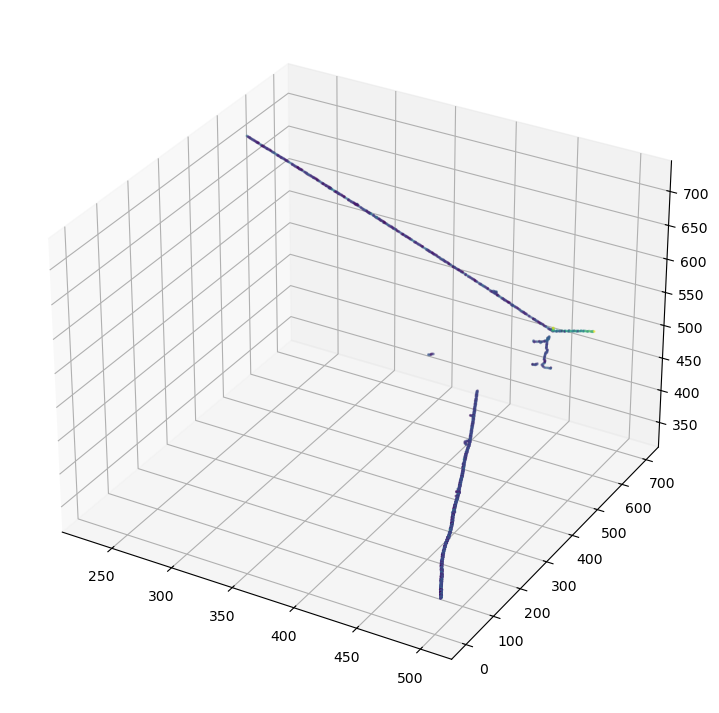

In [10]:
import matplotlib.pyplot as plt

event_idx = 0
event0_points = points[event_idx, :lengths[event_idx]]

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    event0_points[:, 0],
    event0_points[:, 1],
    event0_points[:, 2],
    c=event0_points[:, 3],
    s=1,
)
plt.show()

Now, check out `01_tokenization.ipynb` to see how we group these points into patches.